# FinRL Portfolio Strategy Comparison

This notebook compares the performance of different FinRL portfolio strategies against benchmarks:

## Strategies Analyzed
1. FinRL Models:
   - A2C (Advantage Actor-Critic)
   - SAC (Soft Actor-Critic)
   - PPO (Proximal Policy Optimization)
2. Benchmarks:
   - DJI (Buy and Hold)
   - Mean-Variance Portfolio

## Analysis Period
- Start Date: January 1, 2024
- End Date: July 31, 2024
- Purpose: Trading simulation phase evaluation

## Performance Metrics
- Cumulative Returns (%)
- Strategy Comparison
- Portfolio Value Over Time

In [8]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
import pickle

In [9]:
with open('finrl_df_account_value_a2c.pkl', 'rb') as f:
    finrl_a2c = pickle.load(f)

with open('finrl_df_account_value_sac.pkl', 'rb') as f:
    finrl_sac = pickle.load(f)

with open('finrl_df_account_value_ppo.pkl', 'rb') as f:
    finrl_ppo = pickle.load(f)

with open('finrl_dji.pkl', 'rb') as f:
    finrl_dji = pickle.load(f)

with open('finrl_mean_var.pkl', 'rb') as f:
    finrl_mean_var = pickle.load(f)

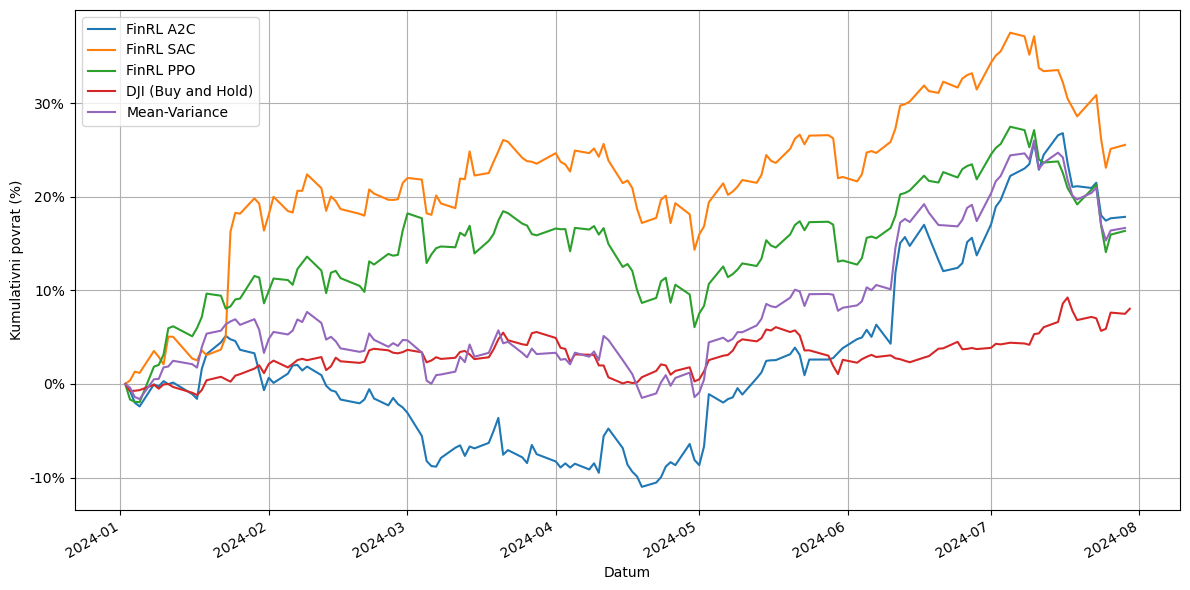

In [10]:
# Function to prepare dataframe
def prepare_dataframe(df):
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
    elif not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    return df.sort_index()

# Function to calculate cumulative return
def calculate_cumulative_return(series):
    return (series / series.iloc[0] - 1) * 100

# Prepare all DataFrames
finrl_a2c = prepare_dataframe(finrl_a2c)
finrl_sac = prepare_dataframe(finrl_sac)
finrl_ppo = prepare_dataframe(finrl_ppo)
finrl_dji = prepare_dataframe(finrl_dji)
finrl_mean_var = prepare_dataframe(finrl_mean_var)

# Calculate cumulative returns
a2c_return = calculate_cumulative_return(finrl_a2c['account_value'])
sac_return = calculate_cumulative_return(finrl_sac['account_value'])
ppo_return = calculate_cumulative_return(finrl_ppo['account_value'])
dji_return = calculate_cumulative_return(finrl_dji['close'])
mean_var_return = calculate_cumulative_return(finrl_mean_var['Mean Var'])

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(a2c_return.index, a2c_return, label='FinRL A2C')
plt.plot(sac_return.index, sac_return, label='FinRL SAC')
plt.plot(ppo_return.index, ppo_return, label='FinRL PPO')
plt.plot(dji_return.index, dji_return, label='DJI (Buy and Hold)')
plt.plot(mean_var_return.index, mean_var_return, label='Mean-Variance')

plt.xlabel('Datum')
plt.ylabel('Kumulativni povrat (%)')
#plt.title('Usporedba FinRL modela, DJI indeksa i Mean-Variance portfolija')
plt.legend()
plt.grid(True)

# Format y-axis to show whole percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}%'))

# Format x-axis for better date display
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()